![example](images/director_shot.jpeg)

# Microsoft Movie Analysis 


**Authors:** Tony Bennett 
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [39]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
# Here you run your code to explore the data
df_imdb_titles = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz",)


In [41]:
df_imdb_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
bom_movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz",index_col=0)


In [43]:
df_imdb_titles_rating = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

In [44]:
df_imdb_titles_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [45]:
df_imdb_titles.shape

(146144, 6)

In [46]:
df_imdb_titles_rating.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [47]:
#tconst is an alphanumeric unique identifier of the title which exists in both data frames. 

df_imdb_titles_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [48]:
# I beleive another could visualization chart would be a bar chart containing the avg of movie ratings on the x = axis and 
# the genres on the y axis 
# This way microsoft can see which genres are performing well with audiences 

In [49]:
# I will create copies of the two dataframes and merge them so I can create the intended viszualizaion and begin cleaning 
imdb_t_basics = df_imdb_titles.copy()
imdb_t_ratings = df_imdb_titles_rating.copy()

In [50]:
# data frames merged
imdb_bas_rat = pd.merge(imdb_t_basics, imdb_t_ratings, how = 'inner', on = 'tconst')
imdb_bas_rat

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [51]:
# checking how many differnet types of genres the data base has
for genres in imdb_bas_rat:
    print(imdb_bas_rat['genres'].unique())

['Action,Crime,Drama' 'Biography,Drama' 'Drama' 'Comedy,Drama'
 'Comedy,Drama,Fantasy' 'Horror,Thriller' 'Adventure,Animation,Comedy'
 'History' 'Documentary' 'Animation,Drama,History' 'Drama,Mystery'
 'Action,Animation,Comedy' 'Crime,Drama' nan 'Biography,Comedy,Drama'
 'Action,Drama' 'Documentary,History' 'Sci-Fi' 'Comedy' 'Thriller'
 'Adventure,Animation,Sci-Fi' 'Drama,Horror' 'Drama,Mystery,Thriller'
 'Drama,Family' 'Adventure,Comedy,Romance' 'Adventure,Drama,Romance'
 'Comedy,Crime,Drama' 'Biography' 'Horror' 'Adventure,Comedy,Drama'
 'Drama,Sci-Fi,Thriller' 'Action' 'Comedy,Drama,Romance'
 'Action,Adventure,Sci-Fi' 'Comedy,Family' 'Adventure' 'Drama,History,War'
 'Action,Thriller' 'Comedy,Crime' 'Crime,Drama,Thriller'
 'Action,Sci-Fi,Thriller' 'Fantasy' 'Drama,Mystery,Sci-Fi'
 'Biography,Drama,History' 'Action,Comedy,Crime'
 'Action,Adventure,Thriller' 'Horror,Mystery,Thriller'
 'Action,Drama,Family' 'Comedy,Drama,Music' 'Drama,Fantasy,Horror'
 'Drama,Romance,Sci-Fi' 'Drama,Thril

In [52]:
#Dropping records with null values 
imdb_bas_rat = imdb_bas_rat.dropna()
imdb_bas_rat

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [53]:
# making sure data is recent to make sure data is analysis is relevant 
imdb_bas_rat['start_year'].unique()

array([2013, 2019, 2018, 2017, 2010, 2011, 2012, 2015, 2016, 2014],
      dtype=int64)

In [54]:
# This will make sure the ratings are valid because enough people voted 
imdb_bas_rat = imdb_bas_rat.sort_values(by = 'numvotes', ascending = False )
imdb_bas_rat

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
16490,tt2074373,Giovanna Cau - Diversamente giovane,Giovanna Cau - Diversamente giovane,2011,70.0,Documentary,5.2,5
16492,tt2074390,Karipap-karipap cinta,Karipap-karipap cinta,2011,110.0,Comedy,5.4,5
40089,tt3806844,Noon Gun,Noon Gun,2015,70.0,Drama,6.8,5
40098,tt3807466,Davin,Davin,2014,93.0,Drama,7.2,5


In [55]:
# top movies users have voted on 
# I beleive the top 1000 movies voted on are all pretty well voted on  
top_voted = imdb_bas_rat.nlargest(5000,'numvotes')
top_voted

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
25634,tt2492916,Muscle Shoals,Muscle Shoals,2013,111.0,"Biography,Documentary,History",7.7,3260
71824,tt8820590,T-34,T-34,2018,139.0,"Action,War",6.3,3259
56558,tt5779540,Dear Dictator,Dear Dictator,2017,90.0,Comedy,5.0,3256
31770,tt3079016,We'll Never Have Paris,We'll Never Have Paris,2014,92.0,"Comedy,Romance",4.6,3256


In [56]:
# convert genres to a list so it can be exploded  
top_voted.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655


In [57]:
#getting avg values of top voted on movies and grouping genres
#group_by_genres = top_voted2.groupby(['genres']).agg({'averagerating' : ['mean']}).reset_index()



In [58]:
# sorting avg ratings by desc 
#top_genre_avg = group_by_genres.sort_values(by=('averagerating','mean'), ascending=False)


In [59]:
# Can now find top ten genres 
#top_ten_genres = top_genre_avg.nlargest(10, ('averagerating','mean'))


In [60]:
# can now create a bar chart for genres and ratings 

In [61]:
# BOM movie gross information looks interesting so I will clean it up a little to be used for a chart 
# A chart showing top movie studios and their total grosses could show microsoft how they should model their studio for
# profitablity 

In [62]:
# data preperation for the BOM gross movie dataframe 

In [63]:
# checking to make sure data is from a relvanat time frame 
bom_movie_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [64]:
# made copy of bom_movie gross for data cleaning 
bom_clean = bom_movie_gross.copy()

In [65]:
bom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [66]:
# clearing out empty values becasue we want to manipulate the data and we don't want null values to skew visualtizations 
#may skew data 
# bom_clean = bom_clean.dropna(axis=0, subset=['foreign_gross'])
# bom_clean = bom_clean.dropna(axis=0, subset=['domestic_gross'])
bom_clean = bom_clean.dropna()

In [67]:
#converting foreign_gross(string) to a float to match domestic_gross
bom_clean['foreign_gross'] = pd.to_numeric(bom_clean['foreign_gross'],errors='coerce')
bom_clean.dtypes

studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [68]:
# can now make a new columnm with total box offices
bom_clean['total_gross'] = bom_clean['domestic_gross'] + bom_clean['foreign_gross']



In [69]:
#add up all total_grosses grouped by studio 
studio_gross = bom_clean.groupby(['studio'], as_index=False)['total_gross'].sum()
# found studios that produce the most money from their films 
top_studio_gross = studio_gross.nlargest(10,'total_gross')
top_studio_gross

,studio,total_gross
22,BV,4.257488e+10
57,Fox,3.098037e+10
163,WB,3.079150e+10
155,Uni.,2.851551e+10
142,Sony,2.240472e+10
126,Par.,1.944420e+10
164,WB (NL),1.031410e+10
89,LGF,8.467471e+09
88,LG/S,5.318924e+09
116,P/DW,5.076500e+09


In [70]:


# part of rec 1 

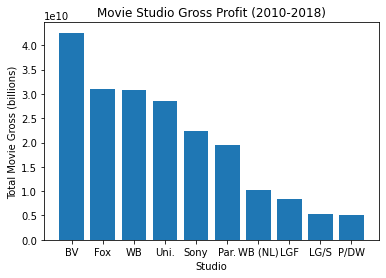

In [71]:
# Here you run your code to clean the data
fig, ax = plt.subplots()
ax.set_ylabel('Total Movie Gross (billions)')
ax.set_xlabel('Studio')
ax.set_title('Movie Studio Gross Profit (2010-2018)')
ax.bar(x=top_studio_gross['studio'], height = top_studio_gross['total_gross'])
plt.show()

In [72]:
# I believe another good visualization to explore would be the most most succesfull films from the most recent year data 
# collected.
# This way microsoft can an even closer look at the type of films that are being produced 

In [73]:
bom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2007 non-null   object 
 1   domestic_gross  2007 non-null   float64
 2   foreign_gross   2002 non-null   float64
 3   year            2007 non-null   int64  
 4   total_gross     2002 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 94.1+ KB


In [74]:
top_bo_movies= movie_prod.nlargest(10, 'worldwide_gross')
top_bo_movies

NameError: name 'movie_prod' is not defined

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
ax.set_ylabel('Total Boxoffice (billions)')
ax.set_xlabel('Movie Title')
ax.set_title('Top Peforming Films of 2018')
ax.bar(x = top_bo_movies['movie'], height = top_bo_movies['worldwide_gross'], width = .3)
plt.show()

In [ ]:
# We can now chart some of the top movies now that we have narrowed down the year to 2018 

In [ ]:
# scatter plot to show how action movie box offices have grown over the years 


In [ ]:
# start by making copies of imdb title df and bom df so we can merge and change them 
df_title_copy2 = df_imdb_titles.copy()
bom_copy2 = bom_clean.copy() 


In [ ]:
# checking heads and shapes of copies and striping awayy null values of imdb titles 

In [ ]:
df_title_copy2=df_title_copy2.dropna()

In [ ]:
df_title_copy2.head()

In [ ]:
# reseting in index to make titel index of the BOM data base a column
# This will help with merge 
bom_copy2 = bom_copy2.reset_index()

In [ ]:
bom_copy2.head()

In [ ]:
# merged togther databases to get acesses to genre and box office 
bom_imdb_t = df_title_copy2.merge(bom_copy2, left_on =['primary_title'] , right_on =['title'])
bom_imdb_t


In [ ]:
no_action = bom_imdb_t[~bom_imdb_t['genres'].str.contains('Adventure')] 
no_action

In [ ]:
#finding records that are action films 
action_genre = bom_imdb_t[bom_imdb_t['genres'].str.contains("Adventure")]
action_genre

In [ ]:
# scatter plot of action films non action over time 
ax = action_genre.plot.scatter(x="year", y = "total_gross",color = "DarkBlue", label = "Adventure Movies")
no_action.plot.scatter(x = "year", y = "total_gross" , color = "LightGreen", label = "Non Adventure Movies", ax=ax)
plt.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# visualize box office and genre 

In [98]:
imdb_title_3 = df_imdb_titles.copy()
bom_clean2 = bom_clean.copy()

In [99]:
imdb_title_3['genres'] = imdb_title_3['genres'].str.split(',')
# top_voted2 = top_voted2['genres'].str.split(',',expand = True)
imdb_title_3 = imdb_title_3.explode('genres')

In [100]:

bom_imdb_genre = imdb_title_3.merge(bom_clean2, left_on =['primary_title'] , right_on =['title'])
bom_imdb_genre

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.0,Adventure,IFC,744000.0,8000000.0,2012,8744000.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0337692,On the Road,On the Road,2012,124.0,Romance,IFC,744000.0,8000000.0,2012,8744000.0
3,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,744000.0,8000000.0,2012,8744000.0
4,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...
4672,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,WGUSA,747000.0,82100000.0,2018,82847000.0
4673,tt8851262,Spring Fever,Spring Fever,2019,NaN,Comedy,Strand,10800.0,150000.0,2010,160800.0
4674,tt8851262,Spring Fever,Spring Fever,2019,NaN,Horror,Strand,10800.0,150000.0,2010,160800.0
4675,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,Trafalgar,4200000.0,16100000.0,2018,20300000.0


In [101]:
# We can now find sum of total box offices grouped by genre 

In [102]:
box_office_genres = bom_imdb_genre.groupby(['genres']).agg({'total_gross' : ['sum']}).reset_index()

In [103]:
top_box_genres = box_office_genres.nlargest(10, ('total_gross','sum'))
top_box_genres

,genres,total_gross
,,sum
1,Adventure,1.184622e+11
0,Action,1.051982e+11
4,Comedy,7.818299e+10
7,Drama,7.185167e+10
2,Animation,3.943573e+10
17,Sci-Fi,3.729742e+10
19,Thriller,3.456644e+10
9,Fantasy,2.782691e+10
5,Crime,1.858052e+10


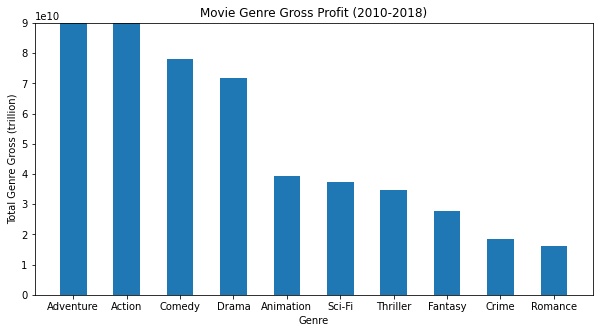

In [106]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Total Genre Gross (billions)')
ax.set_xlabel('Genre')
ax.set_title('Movie Genre Gross Profit (2010-2018)')
ax.set_ylim(0,90000000000)
ax.bar(x=top_box_genres['genres'], height = top_box_genres['total_gross']['sum'], width = .5)
plt.show()

In [76]:
# Budjet vs box office is another metric that I think could be important to look at

In [77]:
#import movie budgets data frame 
movie_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")

In [78]:
# remove dollar and commas sign to help convert these strings to integers
movie_budgets['production_budget'] =  movie_budgets['production_budget'].str.replace('$','')
movie_budgets['worldwide_gross'] =  movie_budgets['worldwide_gross'].str.replace('$','')
movie_budgets['production_budget'] =  movie_budgets['production_budget'].str.replace(',','')
movie_budgets['worldwide_gross'] =  movie_budgets['worldwide_gross'].str.replace(',','')

In [79]:
# convert production budget and movie gross into integers 
movie_budgets['production_budget'] =  movie_budgets['production_budget'].astype(float)
movie_budgets['worldwide_gross'] =  movie_budgets['worldwide_gross'].astype(float)
# movie_budgets[1] = movie_budgets[1].astype(int)

In [80]:
# movie_budgets = pd.concat([movie_budgets, movie_budgets['release_date'].str.split(',', expand = True)], axis = 1)

In [81]:
# movie_budgets = movie_budgets.rename(columns = {1 : 'Year' }, inplace = True)

In [82]:
movie_budgets['year'] = pd.to_datetime(movie_budgets['release_date']).dt.year

In [83]:
movie_budgets['worldwide_gross'].unique()

array([2.77634528e+09, 1.04566388e+09, 1.49762350e+08, ...,
       2.40495000e+05, 1.33800000e+03, 1.81041000e+05])

In [84]:
movie_budgets = movie_budgets.sort_values(by = ['year'], ascending = False)

In [85]:
# gives me a range of movies from a relvant time period that have value for world wide gross 
movie_budgets = movie_budgets[(movie_budgets['year'] >= 2010) & (movie_budgets['year'] <= 2018)]


In [86]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1677,78,"Aug 17, 2018",Mile 22,35000000.0,"$36,108,758",66295121.0,2018
1999,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.0,"$490,973",648599.0,2018
357,58,"Mar 9, 2018",A Wrinkle in Time,103000000.0,"$100,478,608",133401882.0,2018
277,78,"Jul 13, 2018",Skyscraper,125000000.0,"$68,420,120",304115534.0,2018
177,78,"Mar 29, 2018",Ready Player One,150000000.0,"$137,690,172",579290136.0,2018
...,...,...,...,...,...,...,...
1222,23,"Jan 22, 2010",Tooth Fairy,48000000.0,"$60,022,256",112610386.0,2010
4206,7,"Jul 16, 2010",Valhalla Rising,5700000.0,"$30,638",731613.0,2010
653,54,"Jun 4, 2010",Killers,75000000.0,"$47,059,963",95572749.0,2010
3451,52,"Feb 10, 2010",Triangle,12000000.0,$0,1594955.0,2010


In [87]:
# check object types 


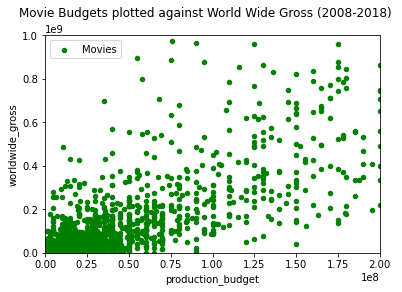

In [88]:
ax = movie_budgets.plot.scatter(x="production_budget", y = "worldwide_gross",color = "Green", label = "Movies")
ax.set_xlim(0,200000000)
ax.set_ylim(0,1000000000)
plt.suptitle('Movie Budgets plotted against World Wide Gross (2008-2018) ')
plt.show()

In [89]:
# Another good visualization to help this final busines recomendation would be bar chart with the top movies of 2018 
# showing their production budgets 

In [90]:
movie_prod = movie_budgets.copy()

In [91]:
# only want data from year 2018 
movie_prod = movie_prod[movie_prod['year'] == 2018]


In [92]:
movie_prod = movie_prod.sort_values(by = ['worldwide_gross'], ascending = False)
movie_prod

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018
41,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,2018
135,36,"Dec 21, 2018",Aquaman,160000000.0,"$335,061,807",1.146895e+09,2018
...,...,...,...,...,...,...,...
5400,1,"Dec 14, 2018",That Way Madness Lies,650000.0,"$1,447",1.447000e+03,2018
5466,67,"May 11, 2018",Higher Power,500000.0,$528,5.280000e+02,2018
2716,17,"Dec 13, 2018",Bird Box,19800000.0,$0,0.000000e+00,2018
1541,42,"Dec 31, 2018",The Crow,40000000.0,$0,0.000000e+00,2018


In [93]:
# create chart from top 2018 films films and show their production budgets 

In [94]:
top_prod = movie_prod.nlargest(10,'worldwide_gross')
top_prod

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018
41,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,2018
135,36,"Dec 21, 2018",Aquaman,160000000.0,"$335,061,807",1.146895e+09,2018
983,84,"Nov 2, 2018",Bohemian Rhapsody,55000000.0,"$216,303,339",8.949853e+08,2018
302,3,"Oct 5, 2018",Venom,116000000.0,"$213,511,408",8.536286e+08,2018
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,178000000.0,"$220,159,104",7.874566e+08,2018
314,15,"May 18, 2018",Deadpool 2,110000000.0,"$324,591,735",7.866806e+08,2018
59,60,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000.0,"$159,555,901",6.522201e+08,2018


C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tonym\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


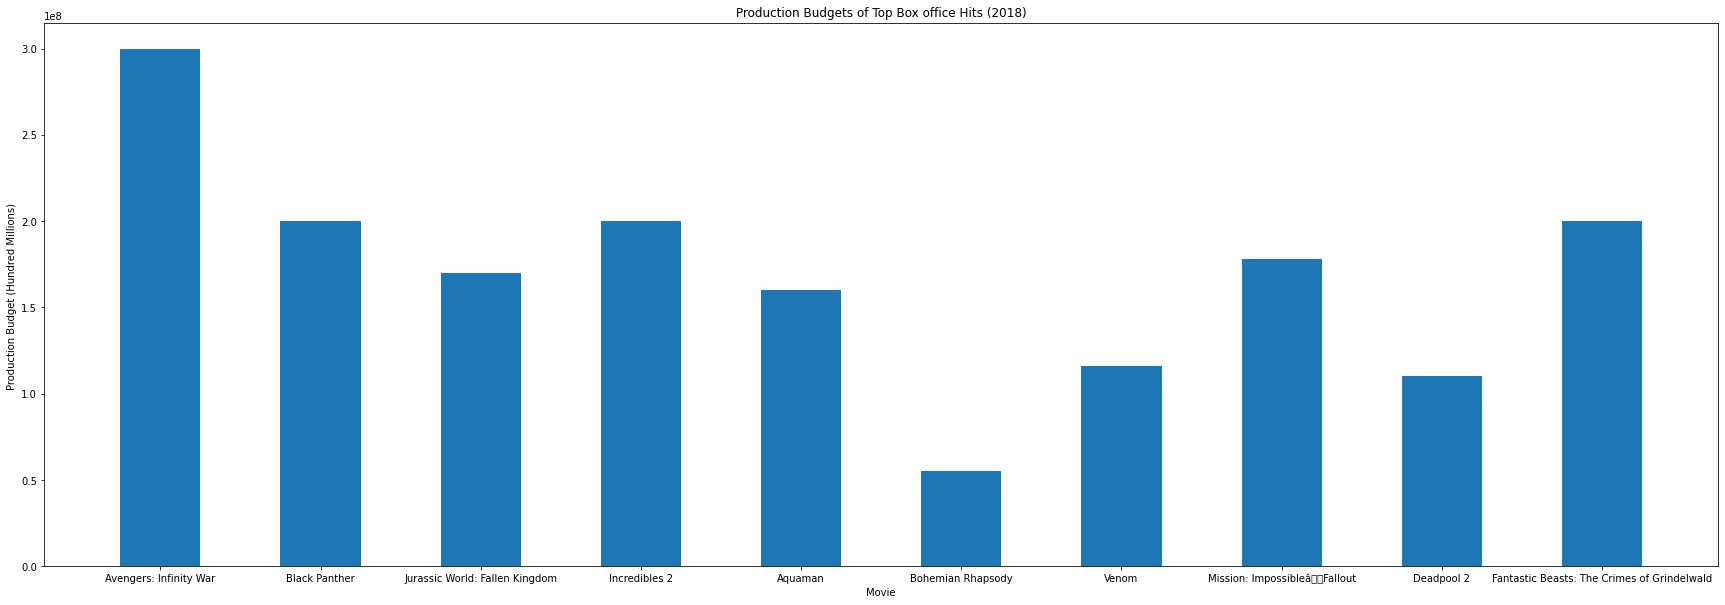

In [95]:
fig, ax = plt.subplots(figsize = (30,10))
ax.set_ylabel('Production Budget (Hundred Millions) ')
ax.set_xlabel('Movie')
ax.set_title('Production Budgets of Top Box office Hits (2018)')
ax.bar(x=top_prod['movie'], height = top_prod['production_budget'], width = .5)
plt.show()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [96]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***